<h2> MNIST Digit Recognition - CNN - Tensorflow Implementation </h2>

<b> About the Project </b>
<br>
<p> 
In this project we will be implementing a Convolutional Neural Network (CNN) with the aim to classify the MNIST Handwritten Digits (0-9) into their respective target classes - 0 to 9. This project can be considered the basics of neural networks and deep neural networks and also as the basics of computer vision as well. 

<br>

<b> Aim of this project </b>
- Implement a CNN network, train it on MNIST dataset and save the high performing network
- Preprocess and normalize the dataset before training.
- Train an MLP model, CNN models with 1, 2 and 3 CNN layers respectively and compare the performance .

<b> Why CNN is being used </b>
- CNNs can capture patterns like edges, shapes, and textures.
- In this project we are using 3 convolutional layers, 1st to detect edges, 2nd to maybe detect curves or corners and final for loops or other high level structures
- They are translation invariant — they can detect a digit even if it’s slightly shifted - so even if input data is augmented by a bit, unlike machine learning models, these can detect the digit with ease. So the extra data augmentation in the preprocessing steps is not needed prior to training. 

</p>

In [97]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

<h4> About the MNIST Dataset and Import </h4>

Here we will be importing the dataset from Tensorflow's built-in datasets. 

<b> About the MNIST Dataset </b>
- MNIST (Modified National Institute of Standards and Technology) consists of 70000 images of handwritten digits. This dataset is considered the benchmark dataset in machine learning.
- Formed by collected 28 * 28 pixel images of digits written by 250 different people.
- Total Images: 70000, out of which 60000 is for training and 10000 is used for testing.
- The target labels in this dataset range from 0 - 9.

In [98]:
# Dataset Import 

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


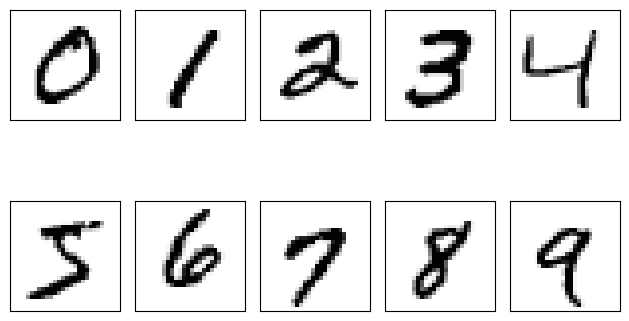

In [99]:
# Printing Sample Images of Each Class

fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()

for i in range(10):
    digit = x_train_full[y_train_full == i][0]
    ax[i].imshow(digit, cmap = "Greys")
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

<h4> Normalizing the Dataset </h4>

- The original pixel values in MNIST range from 0 to 255.
- Neural networks perform better when inputs are in a smaller, consistent range, typically between 0 and 1.
- This helps:
    - Speed up convergence
    - Improve numerical stability
    - Prevent issues with gradient vanishing/exploding

In [100]:
# Normalizing the Dataset to 0 - 1 range. 
# Then shuffling and splitting into train, validation and test sets.
np.random.seed(42)
shuffle_indices = np.random.permutation(60000)
x_train_full, y_train_full = x_train_full[shuffle_indices], y_train_full[shuffle_indices]

x_train_full, x_test = x_train_full / 255, x_test / 255

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 5000, random_state = 42, stratify = y_train_full)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(55000, 28, 28) (55000,) (5000, 28, 28) (5000,)


<h4> Implementing a simple MLP Model </h4>

This is only being done to compare the performance against our CNN Models.  


<b> ** Note ** </b>
Last layer activation is set to softmax at all times because we are dealing with multicass targets. 

In [48]:
# Implementing MLP model

mlp_model = keras.models.Sequential([
    keras.Input(shape = (28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = "relu"),
    keras.layers.Dense(250, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax"),
])

In [49]:
mlp_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,260 (1.98 MB)

 Trainable params: 520,260 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
mlp_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [51]:
mlp_model_history = mlp_model.fit(x_train, y_train, epochs = 20, batch_size = 256, validation_data = (x_val, y_val))

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8475 - loss: 0.5438 - val_accuracy: 0.9560 - val_loss: 0.1464
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9658 - loss: 0.1130 - val_accuracy: 0.9710 - val_loss: 0.1038
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9812 - loss: 0.0627 - val_accuracy: 0.9720 - val_loss: 0.0909
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9873 - loss: 0.0433 - val_accuracy: 0.9756 - val_loss: 0.0866
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9916 - loss: 0.0290 - val_accuracy: 0.9768 - val_loss: 0.0819
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9939 - loss: 0.0209 - val_accuracy: 0.9784 - val_loss: 0.0870
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9962 - loss: 0.0144 - val_accuracy: 0.9796 - val_loss: 0.0801
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9982 - loss: 0.0086 - val_accuracy: 0.

In [52]:
mlp_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0918     


[0.07555942237377167, 0.9840999841690063]

### CNN Model 1 Architecture Description

 Below is a detailed explanation of the architecture:

---

#### Input Shape
- The input shape is `(28, 28, 1)` representing 28×28 grayscale images.
- This matches the MNIST format and prepares the data for convolutional layers.

---

####  Convolutional Layers (Feature Extraction)
- The first block contains **two Conv2D layers** with:
  - `32 filters`, `3x3` kernel size
  - **ReLU activation** and `"same"` padding (to preserve spatial size)
- These layers help extract low-level features such as edges and corners.

---

#### Max Pooling
- A `MaxPooling2D` layer with `pool_size=2` reduces the spatial size (28×28 → 14×14).
- This helps reduce computation and improves generalization.

---

#### Second Convolutional Block
- Another two Conv2D layers with:
  - `64 filters`, `3x3` kernel size
  - `"same"` padding and **ReLU** activation
- Followed by another MaxPooling2D layer which reduces the size further (14×14 → 7×7).
- These layers extract more complex patterns, such as full digit shapes.

---

#### Flatten Layer
- The output of the final pooling layer is flattened into a 1D vector (from 7×7×64 = 3136) to feed into the dense layers.

---

####  Dropout (Regularization)
- `Dropout(0.5)` is used twice to randomly deactivate 50% of neurons during training.
- This helps prevent overfitting and improves generalization.

---

#### Fully Connected Layers
- Two dense (fully connected) layers:
  - `Dense(300)` and `Dense(150)` with **ReLU activation**
- These layers learn high-level representations from the extracted features.

---

#### Output Layer
- `Dense(10, activation='softmax')` outputs probabilities for each of the 10 digit classes (0–9).

---



In [74]:
# Implementing CNN Model 

cnn_x_train = x_train.reshape(-1, 28, 28, 1)
cnn_x_val = x_val.reshape(-1, 28, 28, 1)
cnn_x_test = x_test.reshape(-1, 28, 28, 1)

cnn_model = keras.models.Sequential([
    keras.Input(shape = (28,28, 1)),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same"),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = "relu", padding = "same"),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = "relu", padding = "same"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
])

In [76]:
cnn_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 300)                 │         941,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,052,752 (4.02 MB)

 Trainable params: 1,052,752 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
cnn_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [79]:
cnn_history = cnn_model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data=(x_val, y_val))

Epoch 1/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8387 - loss: 0.4816 - val_accuracy: 0.9802 - val_loss: 0.0666
Epoch 2/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - accuracy: 0.9772 - loss: 0.0788 - val_accuracy: 0.9882 - val_loss: 0.0454
Epoch 3/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.9819 - loss: 0.0586 - val_accuracy: 0.9888 - val_loss: 0.0358
Epoch 4/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.9856 - val_loss: 0.0493
Epoch 5/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - accuracy: 0.9871 - loss: 0.0424 - val_accuracy: 0.9882 - val_loss: 0.0398
Epoch 6/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 57s 66ms/step - accuracy: 0.9877 - loss: 0.0412 - val_accuracy: 0.9908 - val_loss: 0.0381
Epoch 7/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 57s 66ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9916 - val_loss: 0.0345
Epoch 8/15
860/860 ━━━━━━━━━━━━━━━━━━━━ 59s 68ms/step - accuracy: 0.9901 - loss: 0.0317 - 

In [81]:
cnn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9946 - loss: 0.0193 


[0.01602880470454693, 0.9955999851226807]

### CNN Model 1 Architecture Description

 Below is a detailed explanation of the architecture:

---

#### Input Shape
- The input shape is `(28, 28, 1)` representing 28×28 grayscale images.
- This matches the MNIST format and prepares the data for convolutional layers.

---

####  Convolutional Layers (Feature Extraction)
- The first block contains **two Conv2D layers** with:
  - `32 filters`, `3x3` kernel size
  - **ReLU activation** and `"same"` padding (to preserve spatial size)
- These layers help extract low-level features such as edges and corners.

---

#### Max Pooling
- A `MaxPooling2D` layer with `pool_size=2` reduces the spatial size (28×28 → 14×14).
- This helps reduce computation and improves generalization.

---

#### Second Convolutional Block
- Another two Conv2D layers with:
  - `64 filters`, `3x3` kernel size
  - `"same"` padding and **ReLU** activation
- Followed by another MaxPooling2D layer which reduces the size further (14×14 → 7×7).
- These layers extract more complex patterns, such as full digit shapes.

---

#### Flatten Layer
- The output of the final pooling layer is flattened into a 1D vector (from 7×7×64 = 3136) to feed into the dense layers.

---

####  Dropout (Regularization)
- `Dropout(0.5)` is used twice to randomly deactivate 50% of neurons during training.
- This helps prevent overfitting and improves generalization.

---

#### Fully Connected Layers
- Two dense (fully connected) layers:
  - `Dense(300)` and `Dense(150)` with **ReLU activation**
- These layers learn high-level representations from the extracted features.

---

#### Output Layer
- `Dense(10, activation='softmax')` outputs probabilities for each of the 10 digit classes (0–9).

---



In [101]:
from keras import layers, models, callbacks

model = models.Sequential([
    keras.Input(shape=(28,28,1)),

    layers.Conv2D(32, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    
    layers.Conv2D(32, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),

    layers.Conv2D(32, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),


    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),

    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),

    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),

    layers.MaxPool2D(pool_size=2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(300, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(150, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopper = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit
history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs=30,
                    batch_size=64,
                    callbacks=[lr_scheduler, early_stopper])


Epoch 1/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - accuracy: 0.8065 - loss: 0.6239 - val_accuracy: 0.9808 - val_loss: 0.0751 - learning_rate: 0.0010
Epoch 2/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 71s 82ms/step - accuracy: 0.9706 - loss: 0.1025 - val_accuracy: 0.9844 - val_loss: 0.0600 - learning_rate: 0.0010
Epoch 3/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 73s 85ms/step - accuracy: 0.9781 - loss: 0.0741 - val_accuracy: 0.9864 - val_loss: 0.0483 - learning_rate: 0.0010
Epoch 4/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 74s 86ms/step - accuracy: 0.9823 - loss: 0.0605 - val_accuracy: 0.9856 - val_loss: 0.0622 - learning_rate: 0.0010
Epoch 5/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 75s 88ms/step - accuracy: 0.9857 - loss: 0.0490 - val_accuracy: 0.9894 - val_loss: 0.0446 - learning_rate: 0.0010
Epoch 6/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 72s 84ms/step - accuracy: 0.9872 - loss: 0.0455 - val_accuracy: 0.9868 - val_loss: 0.0489 - learning_rate: 0.0010
Epoch 7/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 74s 86ms/step - accuracy: 0.9894 - l

In [102]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9957 - loss: 0.0153


[0.013720777817070484, 0.9962000250816345]

In [106]:
# training the model on full data and re-evaluating 

full_model_3_layers = keras.models.clone_model(model)
full_model_3_layers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_full_train = full_model_3_layers.fit(x_train_full, y_train_full,
                    epochs= 23,
                    batch_size=64)



Epoch 1/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8286 - loss: 0.5668 
Epoch 2/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.9712 - loss: 0.1031 
Epoch 3/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9786 - loss: 0.0762 
Epoch 4/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.9827 - loss: 0.0624 
Epoch 5/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9857 - loss: 0.0477 
Epoch 6/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.9872 - loss: 0.0484 
Epoch 7/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9891 - loss: 0.0384 
Epoch 8/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9892 - loss: 0.0381 
Epoch 9/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.9893 - loss: 0.0369 
Epoch 10/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9910 - loss: 0.0329 
Epoch 11/23
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.9916 - loss: 0.0297 
Epoch 12/23
938/938

In [107]:
full_model_3_layers.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9962 - loss: 0.0168


[0.014589677564799786, 0.9966999888420105]

<h4> Saving the trained model </h4>

In [ ]:
# Uncomment this line and run it to save the trained model. 

#full_model_3_layers.save("mnist_cnn_model_9966_pcnt.keras")